# Inspecting, cleaning, and investigating census data

## Inspecting and cleaning the data

#### Inspecting values and data types. Are they appropriate?

In [1]:
import pandas as pd

census = pd.read_csv('census_data.csv', index_col=0)

print("This sample dataframe contains " + str(census.shape[0]) + " entries.\n\n")
print("A sample of entries:\n\n")
print(census.head())
print("\n\n-----------------------------------")
print("The data types of each column:\n\n")
print(census.dtypes)
print("\n\n-----------------------------------")


This sample dataframe contains 100 entries.


A sample of entries:


  first_name  last_name birth_year  voted  num_children  income_year  \
0     Denise      Ratke       2005  False             0     92129.41   
1       Hali  Cummerata       1987  False             0     75649.17   
2    Salomon        Orn       1992   True             2    166313.45   
3     Sarina   Schiller       1965  False             2     71704.81   
4       Gust  Abernathy       1945  False             2    143316.08   

       higher_tax marital_status  
0        disagree         single  
1         neutral       divorced  
2           agree         single  
3  strongly agree        married  
4           agree        married  


-----------------------------------
The data types of each column:


first_name         object
last_name          object
birth_year         object
voted                bool
num_children        int64
income_year       float64
higher_tax         object
marital_status     object
dtype: ob

#### Investigating why the "birth_year" column is "object" type, not int

In [2]:
print("These are the unique values in the 'birth year' column:\n\n")

print(census.birth_year.unique())

These are the unique values in the 'birth year' column:


['2005' '1987' '1992' '1965' '1945' '1951' '1963' '1949' '1950' '1971'
 '2007' '1944' '1995' '1973' '1946' '1954' '1994' '1989' '1947' '1993'
 '1976' '1984' 'missing' '1966' '1941' '2000' '1953' '1956' '1960' '2001'
 '1980' '1955' '1985' '1996' '1968' '1979' '2006' '1962' '1981' '1959'
 '1977' '1978' '1983' '1957' '1961' '1982' '2002' '1998' '1999' '1952'
 '1940' '1986' '1958']


#### Removing rows with 'missing' birth_year value

In [3]:
mask = census['birth_year'] == 'missing'

census = census[~mask]

print("Rows with 'missing' birth_year values have been removed. These are the updated unique values in the 'birth year' column:\n\n")

print(census.birth_year.unique())

Rows with 'missing' birth_year values have been removed. These are the updated unique values in the 'birth year' column:


['2005' '1987' '1992' '1965' '1945' '1951' '1963' '1949' '1950' '1971'
 '2007' '1944' '1995' '1973' '1946' '1954' '1994' '1989' '1947' '1993'
 '1976' '1984' '1966' '1941' '2000' '1953' '1956' '1960' '2001' '1980'
 '1955' '1985' '1996' '1968' '1979' '2006' '1962' '1981' '1959' '1977'
 '1978' '1983' '1957' '1961' '1982' '2002' '1998' '1999' '1952' '1940'
 '1986' '1958']


#### Changing the type of 'birth_year' to int

In [4]:
census['birth_year'] = census.birth_year.astype(int)

print("The 'birth_year' column been changed to int.\n\n")

print(census.dtypes)

The 'birth_year' column been changed to int.


first_name         object
last_name          object
birth_year          int32
voted                bool
num_children        int64
income_year       float64
higher_tax         object
marital_status     object
dtype: object


#### Finding the mean birth year

In [5]:
print(census.birth_year.mean())

1973.4646464646464


## Grouping categorical variables and adding columns to dataframe

#### Setting an order to the categorical variable 'higher_tax'

In [6]:
census['higher_tax'] = pd.Categorical(census['higher_tax'], ['strongly disagree', 'disagree', 'neutral', 'agree', 'strongly agree'], ordered=True)

census['higher_tax_codes'] = census['higher_tax'].cat.codes

print("A sample of entries showing the new 'higher_tax_code' column:\n\n")

print(census.loc[:,['first_name', 'last_name', 'higher_tax_codes']].head(10))

A sample of entries showing the new 'higher_tax_code' column:


  first_name  last_name  higher_tax_codes
0     Denise      Ratke                 1
1       Hali  Cummerata                 2
2    Salomon        Orn                 3
3     Sarina   Schiller                 4
4       Gust  Abernathy                 3
5       Lady      Hills                 1
6   Tremaine    Pacocha                 0
7      Jaime      Towne                 3
8        Tex      Lynch                 3
9  Nathanial   Gislason                 4


#### Assigning cat codes to find the median value for the higher_tax column

In [7]:
print("The median value for the 'higher_tax' column is:\n")
print(census.higher_tax_codes.median())

The median value for the 'higher_tax' column is:

2.0


#### Assigning cat codes to marital_status

In [8]:
statuses =[census.marital_status.unique()]

statuses_list =[]

for i in statuses[0]:
    statuses_list.append(i)
    
print(statuses_list) 

census['marital_status'] = pd.Categorical(census['marital_status'], statuses_list, ordered=False)

census['marital_status_codes'] = census['marital_status'].cat.codes

print(census.head())

['single', 'divorced', 'married', 'widowed']
  first_name  last_name  birth_year  voted  num_children  income_year  \
0     Denise      Ratke        2005  False             0     92129.41   
1       Hali  Cummerata        1987  False             0     75649.17   
2    Salomon        Orn        1992   True             2    166313.45   
3     Sarina   Schiller        1965  False             2     71704.81   
4       Gust  Abernathy        1945  False             2    143316.08   

       higher_tax marital_status  higher_tax_codes  marital_status_codes  
0        disagree         single                 1                     0  
1         neutral       divorced                 2                     1  
2           agree         single                 3                     0  
3  strongly agree        married                 4                     2  
4           agree        married                 3                     2  


 #### Creating an age_group column by creating and applying a function to each value in the birth_year column

In [9]:
def add_to_age_group(birth_year):
    x = 2024 - birth_year
    if x <= 20:
        return '0 - 20'
    elif x <= 40:
        return '20 - 40'
    elif x <= 60:
        return '40 - 60'
    elif x <= 80:
        return '60 - 80'
    else:
        return 'Over 80'


census['age_group'] = census.birth_year.apply(add_to_age_group)
ages = census.age_group.unique()
census.age_group = pd.Categorical(census.age_group, ages, ordered=True)
census['age_group_codes'] = census.age_group.cat.codes

print(census.head())

  first_name  last_name  birth_year  voted  num_children  income_year  \
0     Denise      Ratke        2005  False             0     92129.41   
1       Hali  Cummerata        1987  False             0     75649.17   
2    Salomon        Orn        1992   True             2    166313.45   
3     Sarina   Schiller        1965  False             2     71704.81   
4       Gust  Abernathy        1945  False             2    143316.08   

       higher_tax marital_status  higher_tax_codes  marital_status_codes  \
0        disagree         single                 1                     0   
1         neutral       divorced                 2                     1   
2           agree         single                 3                     0   
3  strongly agree        married                 4                     2   
4           agree        married                 3                     2   

  age_group  age_group_codes  
0    0 - 20                0  
1   20 - 40                1  
2   20 - 40

#### Checking how many people fall into each age group

In [10]:
print(census.age_group.value_counts())

60 - 80    38
20 - 40    28
40 - 60    21
0 - 20      9
Over 80     3
Name: age_group, dtype: int64


#### Adding a column for age

In [11]:
def add_age(birth_year):
    age = 2024 - birth_year
    return age

census['estimated_age +-1'] = census.birth_year.apply(add_age)

print(census.head(10))

  first_name  last_name  birth_year  voted  num_children  income_year  \
0     Denise      Ratke        2005  False             0     92129.41   
1       Hali  Cummerata        1987  False             0     75649.17   
2    Salomon        Orn        1992   True             2    166313.45   
3     Sarina   Schiller        1965  False             2     71704.81   
4       Gust  Abernathy        1945  False             2    143316.08   
5       Lady      Hills        1951   True             0    160391.20   
6   Tremaine    Pacocha        1963  False             1     49801.77   
7      Jaime      Towne        1949  False             2    140803.16   
8        Tex      Lynch        1950  False             1    122486.71   
9  Nathanial   Gislason        1971   True             4    157088.26   

          higher_tax marital_status  higher_tax_codes  marital_status_codes  \
0           disagree         single                 1                     0   
1            neutral       divorced   

## Checking for correlation between variables:

#### Is there a correlation between higher tax agreement and income?

#### Is there a correlation between higher tax agreement and number of children?

#### Is there a correlation between age group and income?

#### Is there a correlation between income and number of children?

In [12]:
variablesA = ['higher_tax_codes', 'age_group_codes', 'income_year', 'marital_status_codes']
variablesB = ['income_year','num_children','voted']

for i in variablesA:
    for j in variablesB:
        if i == j:
            continue
        else:
            correlation = (census[i].corr(census[j]))
            print("Testing for correlation between " + str(i) + " and " + str(j) + ".")
            print("\n")
            if correlation == 1:
                print("r value: " + str(correlation) + "(Perfect positive correlation between " + str(i) + " and " + str(j) + ".)")
            elif 0.8 <= correlation < 1:
                print("r value: " + str(correlation) + "(Strong positive correlation between " + str(i) + " and " + str(j) + ".)")
            elif 0.4 <= correlation < 0.8:
                print("r value: " + str(correlation) + "( Moderate positive correlation between " + str(i) + " and " + str(j) + ".)")
            elif 0 <= correlation < 0.4:
                print("r value: " + str(correlation) + "( Weak positive correlation between " + str(i) + " and " + str(j) + ".)")
            elif 0 > correlation > -0.4:
                print("r value: " + str(correlation) + "( Weak negative correlation between " + str(i) + " and " + str(j) + ".)")
            elif -0.4 >= correlation > -0.8:
                print("r value: " + str(correlation) + "( Moderate negative correlation between " + str(i) + " and " + str(j) + ".)")
            elif -0.8 >= correlation > -1:
                print("r value: " + str(correlation) + "( Strong negative correlation between " + str(i) + " and " + str(j) + ".)")
            elif correlation == -1:
                print("r value: " + str(correlation) + "( Perfect negative correlation between " + str(i) + " and " + str(j) + ".)")
            print("\n")
            print("-----------------------")
            print("\n")




Testing for correlation between higher_tax_codes and income_year.


r value: 0.1704588059723791( Weak positive correlation between higher_tax_codes and income_year.)


-----------------------


Testing for correlation between higher_tax_codes and num_children.


r value: 0.14486627534310623( Weak positive correlation between higher_tax_codes and num_children.)


-----------------------


Testing for correlation between higher_tax_codes and voted.


r value: -0.13800352401376892( Weak negative correlation between higher_tax_codes and voted.)


-----------------------


Testing for correlation between age_group_codes and income_year.


r value: -0.007244000955307749( Weak negative correlation between age_group_codes and income_year.)


-----------------------


Testing for correlation between age_group_codes and num_children.


r value: 0.1093942945140923( Weak positive correlation between age_group_codes and num_children.)


-----------------------


Testing for correlation between age_

#### How much support is there for a higher tax rate?

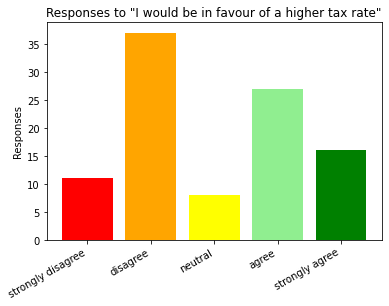

In [13]:
import matplotlib.pyplot as plt

#print(census.higher_tax.value_counts().sort_index())

#vc = census.higher_tax.value_counts()
#labels = vc.index

label_order = ['strongly disagree', 'disagree', 'neutral', 'agree', 'strongly agree']

fig,ax = plt.subplots()

bar_colours = ['red','orange','yellow','lightgreen','green']
ax.bar(label_order, census.higher_tax.value_counts().sort_index(),color=bar_colours)
ax.set_ylabel('Responses')
ax.set_title('Responses to "I would be in favour of a higher tax rate"')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.show()

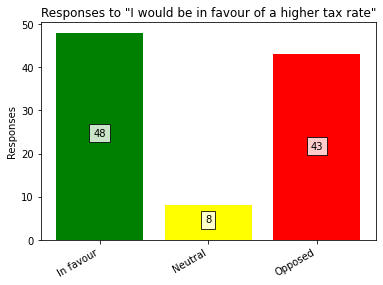

In [14]:
# print(census.higher_tax.value_counts().sort_index())

inFavour = census.higher_tax.value_counts().sort_index()[0] + census.higher_tax.value_counts().sort_index()[1]
neutral = census.higher_tax.value_counts().sort_index()[2]
opposed = census.higher_tax.value_counts().sort_index()[3]+ census.higher_tax.value_counts().sort_index()[4]

groupedResponses = [inFavour, neutral, opposed]

label_order = ['In favour','Neutral','Opposed']

fig,ax = plt.subplots()

bar_colours = ['green','yellow','red']
ax.bar(label_order, groupedResponses,color=bar_colours)
ax.set_ylabel('Responses')
ax.set_title('Responses to "I would be in favour of a higher tax rate"')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

for i in range(len(label_order)):
    plt.text(i,groupedResponses[i]//2,groupedResponses[i], ha = "center", bbox = dict(facecolor = 'white', alpha =.8))


plt.show()

# Conclusions

#### Is there a relationship between higher tax agreement and income?

There is a weak positive correlation between higher tax agreement and income.

#### Is there a relationship between higher tax agreement and number of children?

There is a weak positive correlation between higher tax agreement and number of children.

#### Is there a relationship between age group and income?

There is a weak negative correlation between age group and income.

#### Is there a relationship between income and number of children?

There is a weak positive correlation between income and number of children.

#### How much support is there for a higher tax rate?

48 people are in favour of it, 43 are opposed. 8 are neutral. 
